# Importar base de dados
A atual empresa está testando um novo software e ainda não sabe se ele realmente é rentável para a coorporação. Para isso, vamos demonstrar que ele é muito importante com base nos dados.

[Veremos o prazo de entrega que conseguimos fazer com o novo software]

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

base = pd.read_excel('new_software.xlsx')
base

,Data,Pedidos,Entregas,EntregasnovoSof,TMAantigoSofware,TMAnovoSofware
0,2021-10-01,1230,1230,1230,1230,1
1,2021-11-01,1235,1235,1235,1235,1
2,2021-12-01,1280,1280,1280,1280,1
3,2022-01-01,1310,1310,1310,1310,1
4,2022-02-01,1572,1493,1493,1493,2
5,2022-03-01,2122,1910,1910,1910,3
6,2022-04-01,3183,2546,2546,2546,4
7,2022-05-01,4775,3581,4300,4300,3
8,2022-06-01,5251,3938,5200,5200,3
9,2022-07-01,5779,4136,6100,6100,2


In [140]:
# Olhando informações da base
display(base.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Data              12 non-null     object
 1   Pedidos           12 non-null     int64 
 2   Entregas          12 non-null     int64 
 3   EntregasnovoSof   12 non-null     int64 
 4   TMAantigoSofware  12 non-null     int64 
 5   TMAnovoSofware    12 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 704.0+ bytes


None

## Criar apresentação 
Precisamos apresentar o avanço e o erro crítico de não implementarmos o novo sistema 

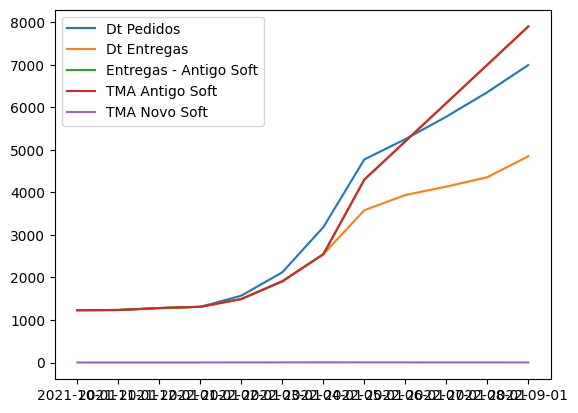

In [141]:
# Olha como uma má apresentação nos trás uma visão errado do que está acontecendo
# Irei primeiro criar um gráfico não visual

fig, ax = plt.subplots()


plt.plot(base['Data'], base['Pedidos'], label='Dt Pedidos')
plt.plot(base['Data'], base['Entregas'], label='Dt Entregas')
plt.plot(base['Data'], base['EntregasnovoSof'], label='Entregas - Antigo Soft')
plt.plot(base['Data'], base['TMAantigoSofware'], label = 'TMA Antigo Soft')
plt.plot(base['Data'], base['TMAnovoSofware'], label='TMA Novo Soft')




plt.legend()
plt.show()

## Agora vamos organizar isso de forma mais clara

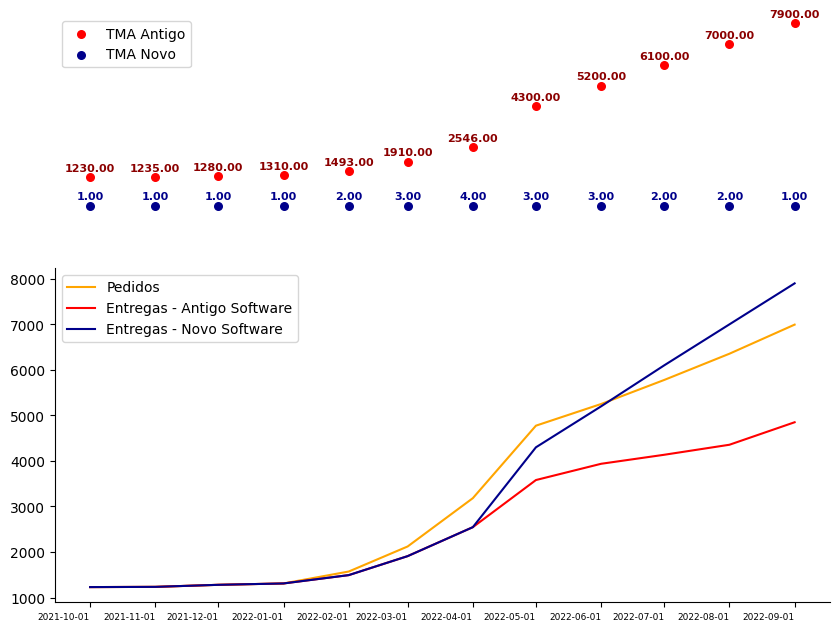

In [142]:
fig, ax = plt.subplots(nrows=2, ncols=1 , figsize=(10,6), gridspec_kw= {'height_ratios': [3,5]})
plt.subplots_adjust(bottom=-0.1)
base['Data'] = pd.to_datetime(base['Data']) # conversão de data

# TMA
ax[0].scatter(base['Data'], base['TMAantigoSofware'], color='red' ,label='TMA Antigo', s=30)
ax[0].scatter(base['Data'], base['TMAnovoSofware'], color='darkblue', label='TMA Novo', s=30)

# Organizar data
ax[0].set_xticks(base['Data'])  
ax[0].set_xticklabels(base['Data'].dt.strftime('%Y-%m-%d'), ha='right',size = 6.5)  
ax[0].legend()

# retirar bordas
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].set_xticks([])  # Remove os valores do eixo x
ax[0].set_yticks([])  # Remove os valores do eixo y
ax[0].set_xlabel('')  # Remove o rótulo do eixo x
ax[0].set_ylabel('')  # Remove o rótulo do eixo y


# annotate
for i, line in enumerate([base['TMAantigoSofware'], base['TMAnovoSofware']]):
    for x, y in zip(base['Data'], line):
        ax[0].annotate(
            f"{y:.2f}",  # valor
            (x, y),  # Posição do ponto de dados
            ha='center',  # Alinhamento horizontal do texto
            va='bottom',  # Alinhamento vertical do texto
            textcoords='offset points',  # Usar coordenadas relativas ao ponto
            xytext=(0, 3),  # Deslocamento do texto em relação ao ponto (0 na horizontal, 5 na vertical)
            fontsize=8,
            fontweight='bold',
            color='darkred' if i == 0 else 'darkblue'
        )



# Produtos
ax[1].plot(base['Data'], base['Pedidos'], color='orange', label = 'Pedidos')
ax[1].plot(base['Data'], base['Entregas'], color='red', label = 'Entregas - Antigo Software')
ax[1].plot(base['Data'], base['EntregasnovoSof'], color='darkblue', label = 'Entregas - Novo Software')
ax[1].legend()

# Organizar data
ax[1].set_xticks(base['Data'])  
ax[1].set_xticklabels(base['Data'].dt.strftime('%Y-%m-%d'), ha='right',size = 6.5)  
ax[1].legend()

# retirar bordas
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)


plt.show()

# ANÁLISE
Como vemos no gráfico acima, identificamos que :
- O novo sofware tem um TMA muito mais baixo, enquanto o antigo sofware tem um TMA altissimo !
- Conseguimos entregar muito mais com o *NOVO* software, do que o antigo